<a href="https://colab.research.google.com/github/ivan-block/Second-Hand-Cars-Regression/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError, Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

In [4]:
df = pd.read_csv('train.csv')

df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [5]:
df.shape

(1000, 12)

In [6]:
tensor_data = tf.constant(df)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float64)


In [7]:
#tensor_data = tf.random.shuffle(df)
#print(tensor_data[:5])

In [8]:
X = tensor_data[:,3:-1]
X.shape

y = tensor_data[:,-1]
y.shape


TensorShape([1000])

In [9]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATA_SET = len(X)

In [10]:
X_train = X[:int(TRAIN_RATIO*DATA_SET)]
y_train = y[:int(TRAIN_RATIO*DATA_SET)]

print(X_train.shape)
print(y_train.shape)

(800, 8)
(800,)


In [11]:
X_val = X[int(TRAIN_RATIO*DATA_SET):int((VAL_RATIO+TRAIN_RATIO)*DATA_SET)]
y_val = y[int(TRAIN_RATIO*DATA_SET):int((VAL_RATIO+TRAIN_RATIO)*DATA_SET)]

print(X_val.shape)
print(y_val.shape)

(100, 8)
(100,)


In [12]:
X_test = X[int((VAL_RATIO+TRAIN_RATIO)*DATA_SET):]
y_test = y[int((VAL_RATIO+TRAIN_RATIO)*DATA_SET):]

print(X_test.shape)
print(y_test.shape)

(100, 8)
(100,)


In [13]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.9117589 , -0.6980478 , -1.4046503 , -1.285972  ,  1.0915856 ,
         0.5131691 , -0.575506  ,  0.9342201 ],
       [ 0.83045536,  0.61544764,  1.3976445 ,  1.1964284 , -1.1406962 ,
        -0.98759097, -0.526438  , -0.38756672],
       [-1.492497  ,  1.1411203 , -0.70407665,  0.8417998 ,  1.5380421 ,
         0.7201705 , -1.5568652 , -0.29315338],
       [-0.33102083,  0.06105132,  0.6970708 , -0.93134344, -0.24778342,
         1.548176  , -1.5077972 ,  0.60377336],
       [ 0.83045536, -1.2946887 , -0.00350295,  1.1964284 ,  0.19867295,
        -0.3665868 , -1.5568652 ,  0.08449998]], dtype=float32)>

In [14]:
print(X[:5])

tf.Tensor(
[[3.00000e+00 7.89450e+04 1.00000e+00 2.00000e+00 1.40000e+01 1.77000e+02
  7.30000e+01 1.23000e+02]
 [6.00000e+00 1.17220e+05 5.00000e+00 9.00000e+00 9.00000e+00 1.48000e+02
  7.40000e+01 9.50000e+01]
 [2.00000e+00 1.32538e+05 2.00000e+00 8.00000e+00 1.50000e+01 1.81000e+02
  5.30000e+01 9.70000e+01]
 [4.00000e+00 1.01065e+05 4.00000e+00 3.00000e+00 1.10000e+01 1.97000e+02
  5.40000e+01 1.16000e+02]
 [6.00000e+00 6.15590e+04 3.00000e+00 9.00000e+00 1.20000e+01 1.60000e+02
  5.30000e+01 1.05000e+02]], shape=(5, 8), dtype=float64)


In [15]:
model = tf.keras.Sequential ([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(1)
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 17 (72.00 B)

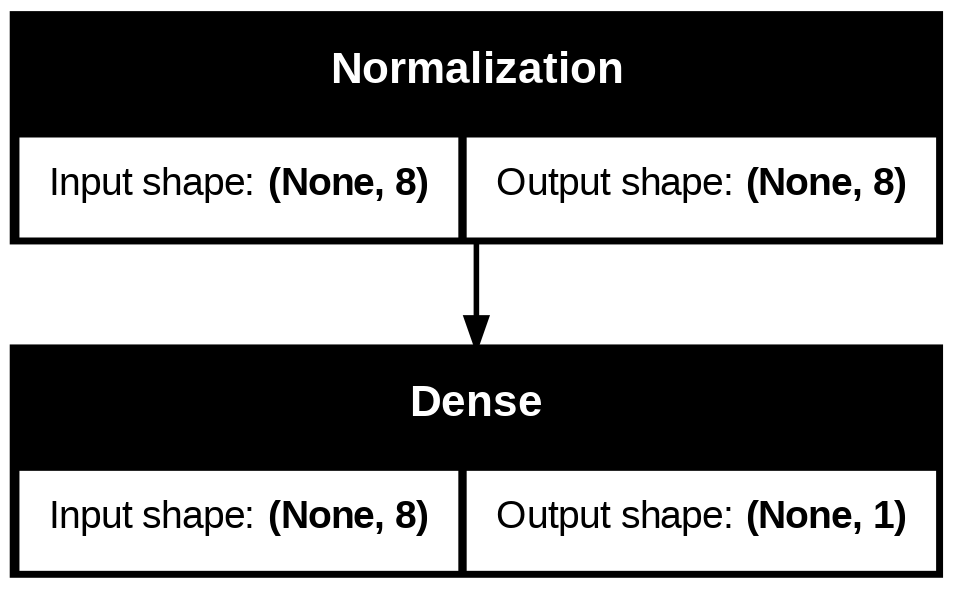

In [16]:
model.build()
tf.keras.utils.plot_model(model, to_file='models.png', show_shapes=True)

In [17]:
model.compile( optimizer = Adam(learning_rate= 1.0),
    loss = MeanAbsoluteError(),
    metrics = [RootMeanSquaredError()])

In [18]:

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 305218.5938 - root_mean_squared_error: 331250.0938 - val_loss: 273442.3125 - val_root_mean_squared_error: 299993.8750
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 312751.9375 - root_mean_squared_error: 337762.2188 - val_loss: 273417.0000 - val_root_mean_squared_error: 299970.3125
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 310420.6875 - root_mean_squared_error: 334583.2188 - val_loss: 273391.3125 - val_root_mean_squared_error: 299946.8438
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 315619.2812 - root_mean_squared_error: 339295.3125 - val_loss: 273367.1250 - val_root_mean_squared_error: 299924.3750
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 314501.7500 - root_mean_squared_error: 339244.3438 - val_loss: 273342.1875 - val_root_mean_squared_error: 299902.1562
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 316747.4688 - root_mean_squared_error: 341265.2812 - va

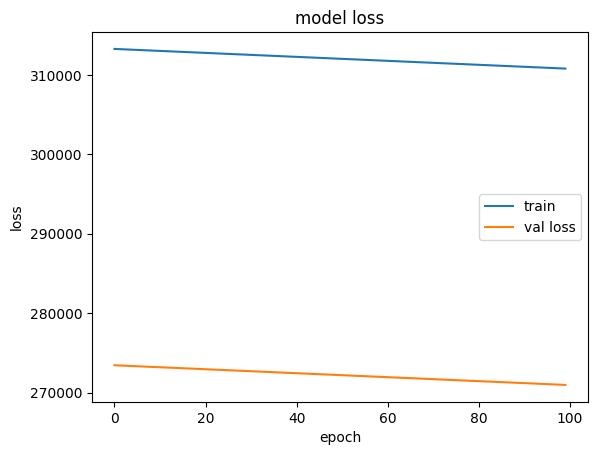

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['train', 'val loss'])
plt.show()

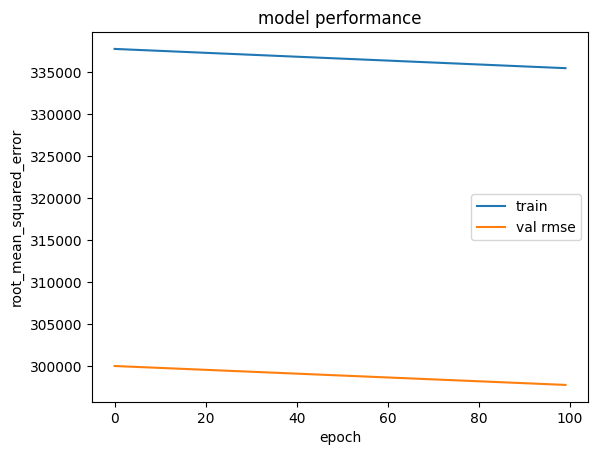

In [20]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.xlabel('epoch')
plt.ylabel('root_mean_squared_error')
plt.title('model performance')
plt.legend(['train', 'val rmse'])
plt.show()

In [21]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 302762.1875 - root_mean_squared_error: 325096.6875 


[302977.03125, 326004.21875]

In [22]:
X_test.shape

TensorShape([100, 8])